In [3]:

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


db_user = 'root'       
db_password = '****'     
db_host = 'localhost'   
db_port = '3306'       
db_name = '****'      


engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')


query = """
SELECT 
    p.segment,
    COUNT(DISTINCT s.product_code) AS product_count
FROM 
    fact_sales_monthly s
JOIN 
    dim_product p ON s.product_code = p.product_code
GROUP BY 
    p.segment
ORDER BY 
    product_count DESC;
"""


df = pd.read_sql(query, engine)

df


,segment,product_count
0,Notebook,116
1,Accessories,104
2,Peripherals,79
3,Desktop,22
4,Storage,17
5,Networking,9


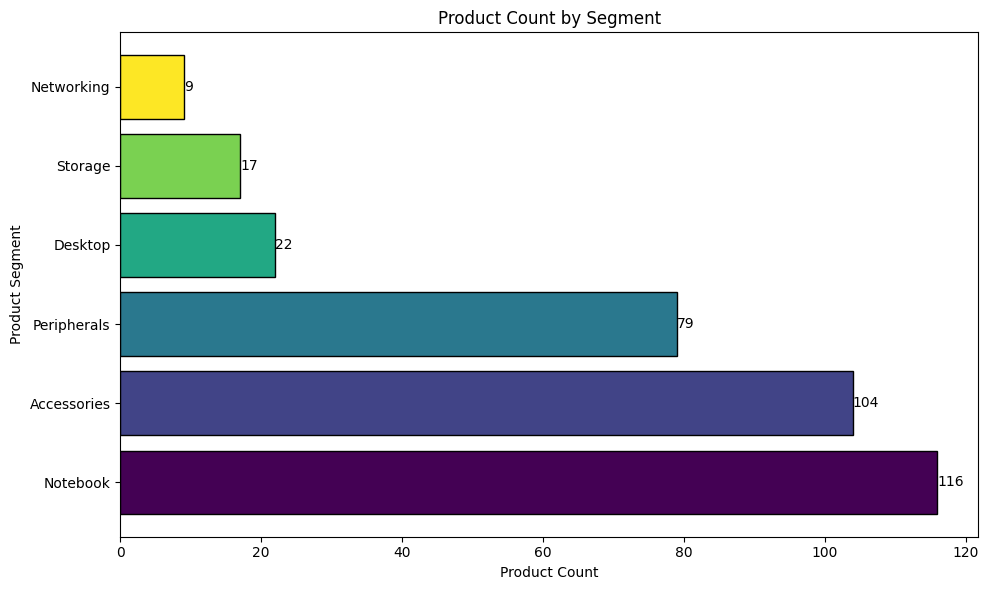

In [6]:

segments = df['segment']
product_counts = df['product_count']


colors = plt.cm.viridis(np.linspace(0, 1, len(segments))) 


plt.figure(figsize=(10, 6))
plt.barh(segments, product_counts, color=colors, edgecolor='black')


plt.title('Product Count by Segment')
plt.xlabel('Product Count')
plt.ylabel('Product Segment')


for index, value in enumerate(product_counts):
    plt.text(value, index, str(value), va='center')


plt.tight_layout()

plt.savefig('product_count_by_segment.png', dpi=300, bbox_inches='tight')


plt.show()